In [18]:
import sys
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Implementing a perceptron learning algorithm in Python

In [4]:
class Perceptron:
    """Perceptron classifier
    
    Parameters
    ---------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
    
    Attributes
    -----------------
    w_ : 1d-array
        Weights after fitting
    b_ : Scalar
        Bias unit after fitting
    errors_ : list
        Number of misclassifications (updates) in each epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ----------------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and n_features is the number of features
        y : array-like, shape = [n_examples]
            Target values
        
        Returns
        ----------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # initial weights with small random numbers
        
        # self.w_ = np.zeros(X.shape[1]) # initializing weights with 0, will also work but the learning rate (eta)
                                         # will have no effect on the decision boudary, it will only affect the scale of the 
                                         # weight vector, not the direction.
        self.b_ = np.float_(0.)
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
                

# Working with Iris dataset

In [8]:
s = 'iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')

In [11]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values

### Training the perceptron model

In [62]:
ppn = Perceptron(eta=0.0001, n_iter=10)

ppn.fit(X, y)

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

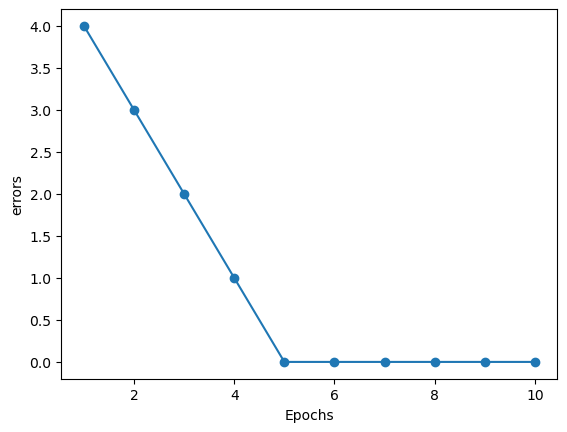

In [49]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('errors')
plt.show()

# Experimenting with diabetes dataset from Kaggle

In [54]:
d = "diabetes_prediction_dataset.csv"
df = pd.read_csv(d, encoding='utf-8')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [36]:
# select first 100 rows
y = df.iloc[0:100, 8].values
X = df.iloc[0:100, [1,2,3,5,6,7]].values

In [37]:
ppn = Perceptron(eta=0.01, n_iter=100)
ppn.fit(X, y)

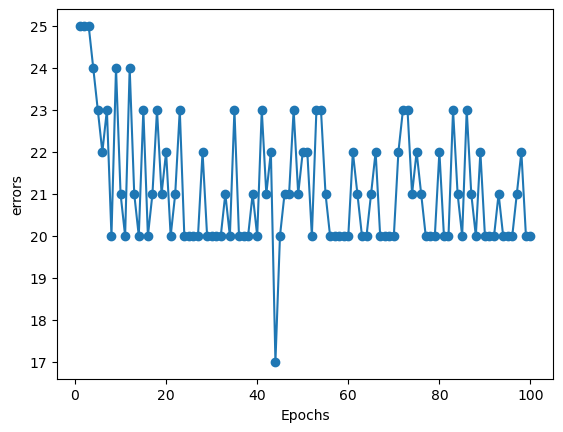

In [38]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('errors')
plt.show()

- the error in the above plot seems to keep bouncing around 20ish and never able to get down close to 0.
- lets try normalizing the data with various normalization techiques

#### Linear scaling / scaling to a range


In [45]:
def linear_scaling(ser):
    res = (ser - ser.min()) / (ser.max() - ser.min())
    return res

In [50]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for feature in features:
    df[feature] = linear_scaling(df[feature])

In [51]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.523096,0.07485,0.039420,0.202040,0.368638,0.263900,0.085000
std,0.281742,0.26315,0.194593,0.077460,0.194668,0.185037,0.278883
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299299,0.00000,0.000000,0.158964,0.236364,0.090909,0.000000
50%,0.537037,0.00000,0.000000,0.202031,0.418182,0.272727,0.000000
75%,0.749750,0.00000,0.000000,0.228408,0.490909,0.359091,0.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# select first 100 rows
y = df.iloc[0:100, 8].values
X = df.iloc[0:100, [1,2,3,5,6,7]].values

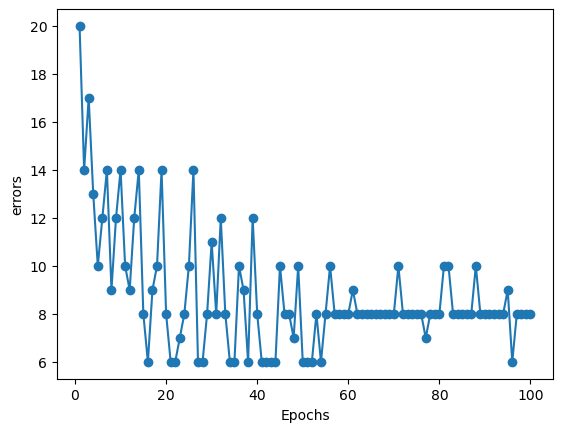

In [53]:
ppn = Perceptron(eta=0.01, n_iter=100)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('errors')
plt.show()

- error seems to have come down quite a bit after linear scaling, proving the incorrectly scaled data was making the model biased towards some of the features.

#### Z-score scaling

In [55]:
def z_score_scaling(ser):
    res = (ser - ser.mean())/ser.std()
    return res

In [56]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for feature in features:
    df[feature] = z_score_scaling(df[feature])

In [57]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,1.332090e-16,-3.471001e-17,-5.837109e-17,-1.739053e-16,7.034373e-18,-2.992806e-16,0.085000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.278883
min,-1.856648e+00,-2.844380e-01,-2.025766e-01,-2.608307e+00,-1.893677e+00,-1.426203e+00,0.000000
25%,-7.943324e-01,-2.844380e-01,-2.025766e-01,-5.561078e-01,-6.794863e-01,-9.349006e-01,0.000000
50%,4.948048e-02,-2.844380e-01,-2.025766e-01,-1.155831e-04,2.545065e-01,4.770398e-02,0.000000
75%,8.044710e-01,-2.844380e-01,-2.025766e-01,3.404108e-01,6.281036e-01,5.144411e-01,0.000000
max,1.692695e+00,3.515669e+00,4.936354e+00,1.030156e+01,3.243283e+00,3.978122e+00,1.000000


In [58]:
# select first 100 rows
y = df.iloc[0:100, 8].values
X = df.iloc[0:100, [1,2,3,5,6,7]].values

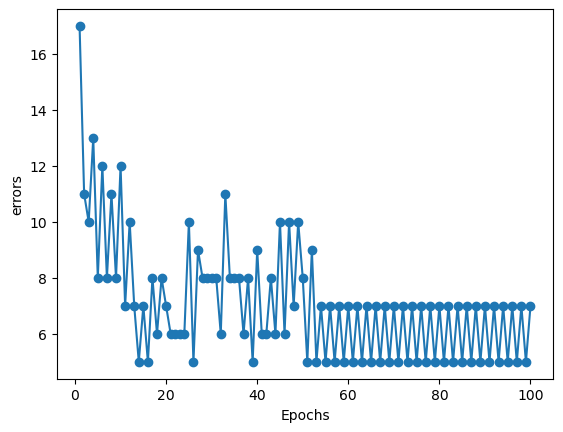

In [59]:
ppn = Perceptron(eta=0.01, n_iter=100)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('errors')
plt.show()

- errors don't seem to improve as much using z-score scaling when compared to linear scaling.